## Climate Predicting Project

In [7]:
## important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator


## Data preprocessing

In [8]:

## load the dataset
data=pd.read_csv(r"C:/Users/hp/OMDENA/capstone-project-1962vickyrena/data/tanzania_climate_data.csv")

#Handle missing values
print("Missing values before handling:")
print(data.isnull().sum())
print(data.head())
 


Missing values before handling:
Year                     0
Month                    0
Average_Temperature_C    0
Total_Rainfall_mm        0
Max_Temperature_C        0
Min_Temperature_C        0
dtype: int64
   Year  Month  Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
0  2000      1                   26.1               19.8               32.0   
1  2000      2                   25.8               87.3               29.5   
2  2000      3                   26.8              266.5               29.9   
3  2000      4                   26.3              136.7               30.1   
4  2000      5                   26.0               63.1               30.7   

   Min_Temperature_C  
0               21.9  
1               22.7  
2               21.8  
3               22.9  
4               22.4  


In [9]:
##Converting data types

# Fix: Properly create datetime column
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str) + '-01')


### Step 3 : Categorical encoding


## Exploratory Data Analysis (EDA)

In [10]:

# 1. Statistical Summaries
print("\n===== Descriptive Statistics =====")

print(data.describe())





===== Descriptive Statistics =====
              Year       Month  Average_Temperature_C  Total_Rainfall_mm  \
count   252.000000  252.000000             252.000000         252.000000   
mean   2010.000000    6.500000              25.707540         100.363889   
min    2000.000000    1.000000              24.200000           6.000000   
25%    2005.000000    3.750000              25.300000          39.325000   
50%    2010.000000    6.500000              25.700000          72.200000   
75%    2015.000000    9.250000              26.000000         147.700000   
max    2020.000000   12.000000              27.500000         297.400000   
std       6.067351    3.458922               0.541047          80.485087   

       Max_Temperature_C  Min_Temperature_C                           Date  
count         252.000000         252.000000                            252  
mean           30.576587          21.698016  2010-06-16 14:17:08.571428608  
min            28.300000          19.700000     

### Step 2 :Data Visualization

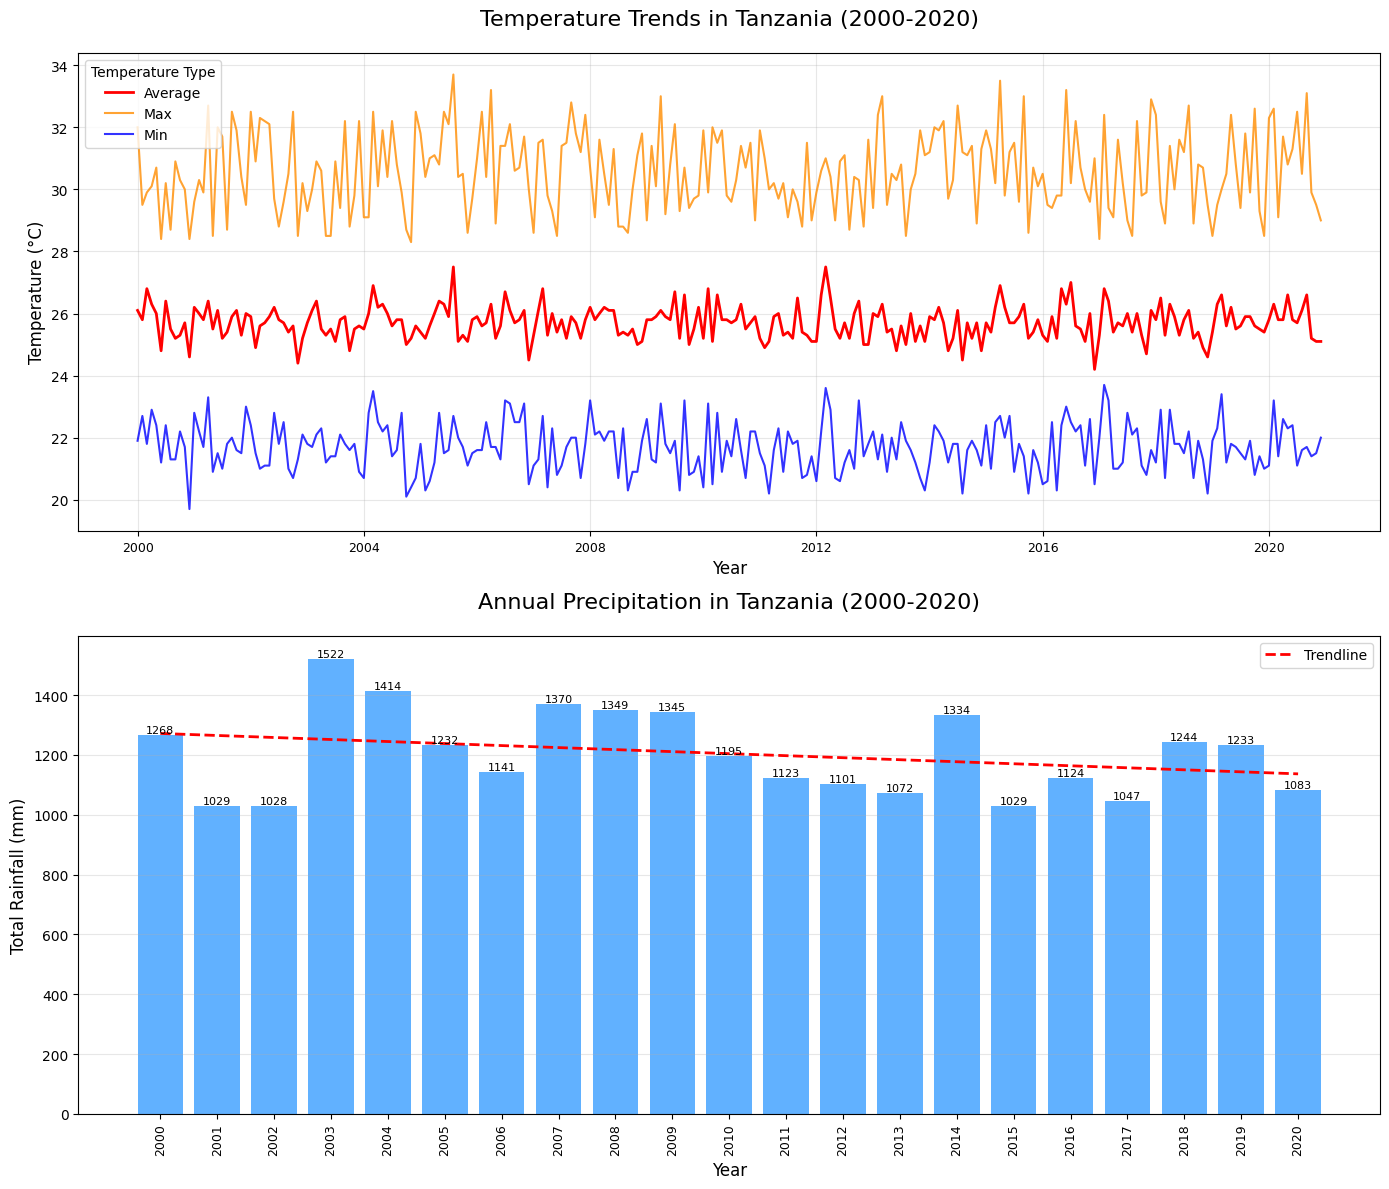

In [11]:


from io import StringIO

# Create figure with subplots
plt.figure(figsize=(14, 12))

# Temperature Trends Plot
plt.subplot(2, 1, 1)
sns.lineplot(data=data, x='Date', y='Average_Temperature_C', label='Average', color='red', linewidth=2)
sns.lineplot(data=data, x='Date', y='Max_Temperature_C', label='Max', color='darkorange', alpha=0.8, linewidth=1.5)
sns.lineplot(data=data, x='Date', y='Min_Temperature_C', label='Min', color='blue', alpha=0.8, linewidth=1.5)
plt.title('Temperature Trends in Tanzania (2000-2020)', fontsize=16, pad=20)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Temperature Type', fontsize=10)
plt.xticks(fontsize=9)


# Rainfall Levels Plot
plt.subplot(2, 1, 2)
# Calculate annual rainfall
annual_rain = data.groupby('Year')['Total_Rainfall_mm'].sum().reset_index()

# Bar plot
bars = plt.bar(annual_rain['Year'], annual_rain['Total_Rainfall_mm'], 
               color='dodgerblue', alpha=0.7, width=0.8)

# Add data labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=8)

# Add trendline
z = np.polyfit(annual_rain['Year'], annual_rain['Total_Rainfall_mm'], 1)
p = np.poly1d(z)
plt.plot(annual_rain['Year'], p(annual_rain['Year']), "r--", linewidth=2, label='Trendline')


plt.title('Annual Precipitation in Tanzania (2000-2020)', fontsize=16, pad=20)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(annual_rain['Year'], rotation=90, fontsize=9)
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

### Step 3:Correlation Analysis

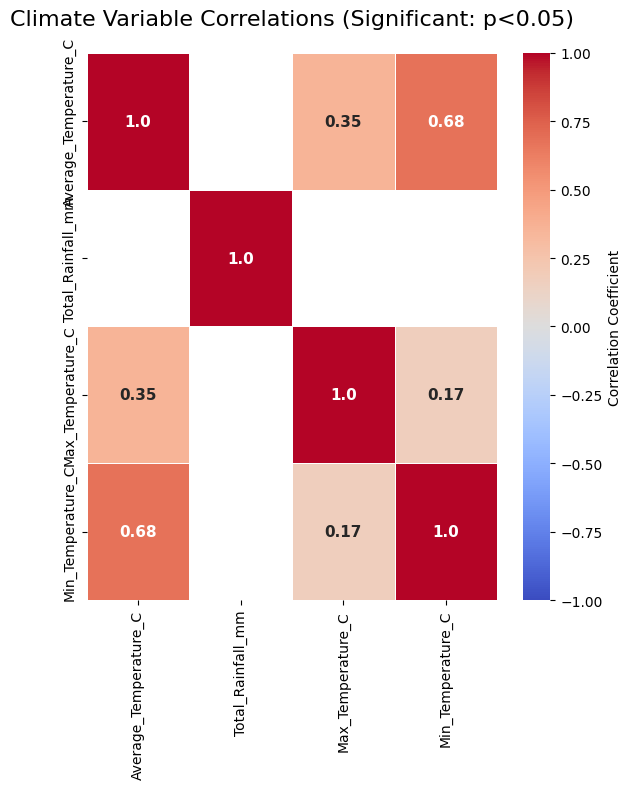

<Figure size 1200x1000 with 0 Axes>

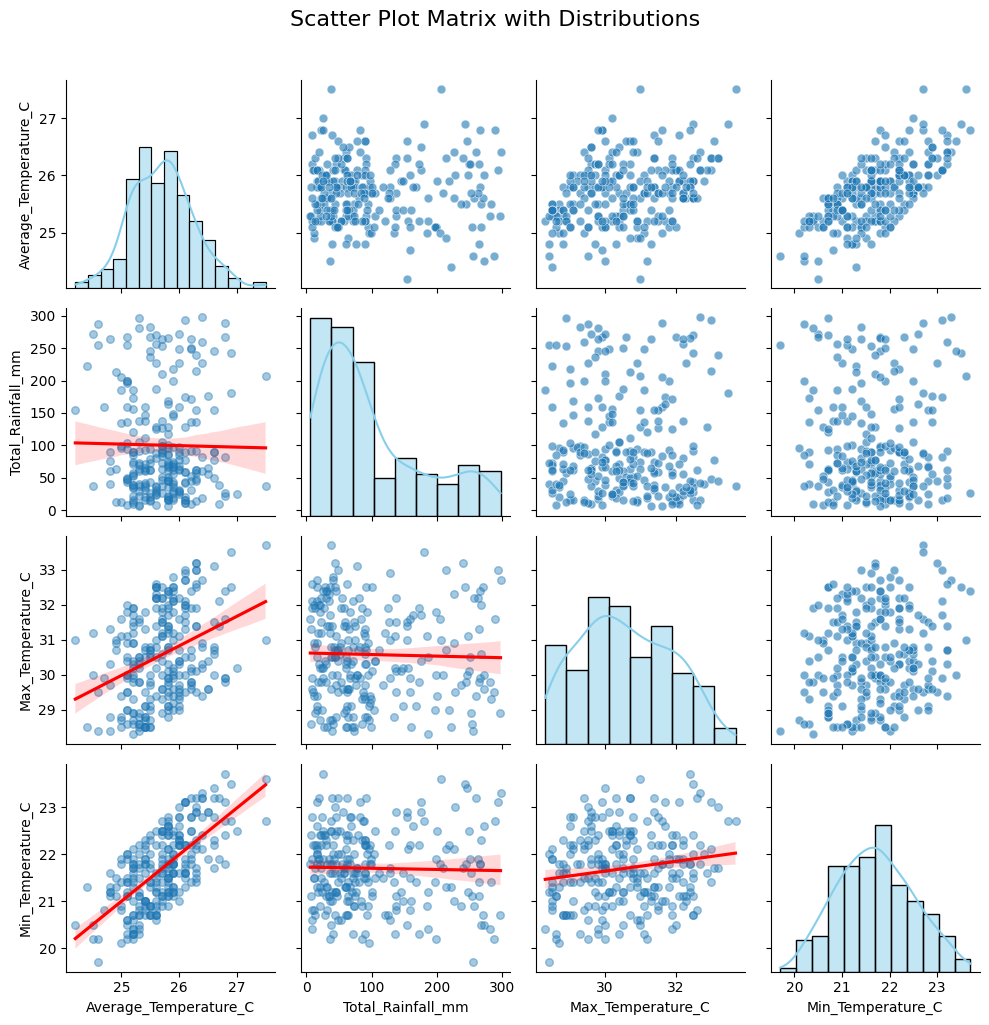

In [13]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create datetime index
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(day=1))
data.set_index('Date', inplace=True)

# Correlation heatmap with statistical significance
plt.figure(figsize=(6, 8))
corr_cols = ['Average_Temperature_C', 'Total_Rainfall_mm', 
             'Max_Temperature_C', 'Min_Temperature_C']
corr_matrix = data[corr_cols].corr()

# Create p-value matrix for significance
p_matrix = np.zeros_like(corr_matrix)
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        col_i = corr_cols[i]
        col_j = corr_cols[j]
        _, p_value = stats.pearsonr(data[col_i], data[col_j])
        p_matrix[i, j] = p_value < 0.05  # Mark significant correlations

# Create mask for non-significant correlations
mask = ~p_matrix.astype(bool)

# Create annotation matrix (only show significant correlations)
annot_matrix = np.where(mask, "", corr_matrix.round(2).astype(str))

# Plot heatmap
sns.heatmap(corr_matrix, annot=annot_matrix, cmap='coolwarm', vmin=-1, vmax=1,
            mask=mask, fmt='', linewidths=0.5, 
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'weight': 'bold', 'size': 11})
plt.title('Climate Variable Correlations (Significant: p<0.05)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Scatter plot matrix with regression lines
plt.figure(figsize=(12, 10))
g = sns.PairGrid(data[corr_cols])
g.map_upper(sns.scatterplot, alpha=0.6, s=40)
g.map_lower(sns.regplot, scatter_kws={'alpha':0.4, 's':30}, 
            line_kws={'color':'red'})
g.map_diag(sns.histplot, kde=True, color='skyblue')
plt.suptitle('Scatter Plot Matrix with Distributions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### Step 4: Seasonal Decomposition

In [14]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


C:\Users\hp\AppData\Local\Temp\ipykernel_36424\387815197.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  rain_series = rain_series.fillna(method='ffill')
C:\Users\hp\AppData\Local\Temp\ipykernel_36424\387815197.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temp_series = temp_series.fillna(method='ffill')


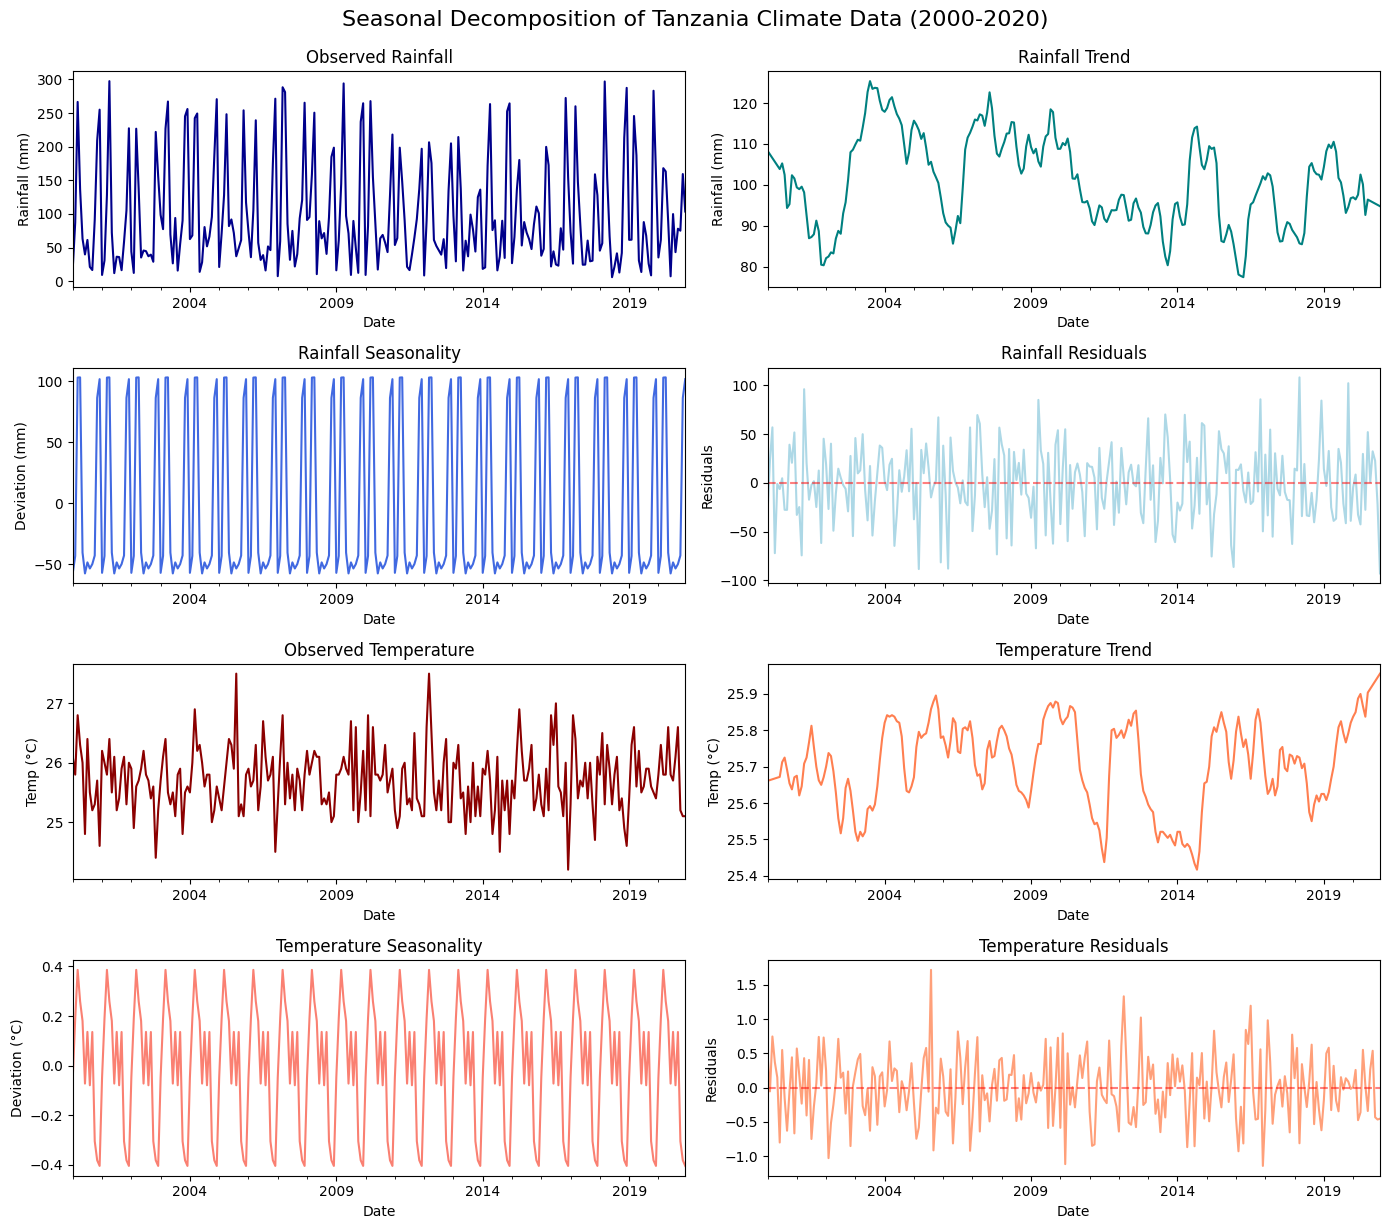


Key Climate Change Indicators:
- Rainfall Trend: -0.65 mm/year decrease
- Temperature Trend: 0.014 °C/year increase
- Rainfall Seasonal Amplitude: 160.9 mm
- Temperature Seasonal Amplitude: 0.8 °C
- Rainfall Residual Range: -92.9 to 108.2 mm
- Temperature Residual Range: -1.1 to 1.7 °C


C:\Users\hp\AppData\Local\Temp\ipykernel_36424\387815197.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rain_slope = (rain_trend[-1] - rain_trend[0]) / (len(rain_trend) / 12)
C:\Users\hp\AppData\Local\Temp\ipykernel_36424\387815197.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_slope = (temp_trend[-1] - temp_trend[0]) / (len(temp_trend) / 12)


In [15]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Create a copy of your data for decomposition
df_decomp = data.copy()

# Ensure we're working with monthly frequency data
df_decomp = df_decomp.asfreq('MS')  # Month Start frequency

# 1. Rainfall Decomposition ------------------------------------------------
rain_series = df_decomp['Total_Rainfall_mm']

# Handle any missing values (simple forward fill)
rain_series = rain_series.fillna(method='ffill')

# Perform additive decomposition (rainfall typically additive)
rain_decomp = seasonal_decompose(rain_series, model='additive', period=12, extrapolate_trend='freq')

# 2. Temperature Decomposition --------------------------------------------
temp_series = df_decomp['Average_Temperature_C']

# Handle any missing values
temp_series = temp_series.fillna(method='ffill')

# Perform additive decomposition (temperature typically additive)
temp_decomp = seasonal_decompose(temp_series, model='additive', period=12, extrapolate_trend='freq')

# 3. Plot the decomposition results ---------------------------------------
plt.figure(figsize=(14, 12))

# Rainfall decomposition
plt.subplot(4, 2, 1)
rain_decomp.observed.plot(title='Observed Rainfall', color='darkblue')
plt.ylabel('Rainfall (mm)')

plt.subplot(4, 2, 2)
rain_decomp.trend.plot(title='Rainfall Trend', color='teal')
plt.ylabel('Rainfall (mm)')

plt.subplot(4, 2, 3)
rain_decomp.seasonal.plot(title='Rainfall Seasonality', color='royalblue')
plt.ylabel('Deviation (mm)')

plt.subplot(4, 2, 4)
rain_decomp.resid.plot(title='Rainfall Residuals', color='lightblue')
plt.ylabel('Residuals')
plt.axhline(0, color='r', linestyle='--', alpha=0.5)

# Temperature decomposition
plt.subplot(4, 2, 5)
temp_decomp.observed.plot(title='Observed Temperature', color='darkred')
plt.ylabel('Temp (°C)')

plt.subplot(4, 2, 6)
temp_decomp.trend.plot(title='Temperature Trend', color='coral')
plt.ylabel('Temp (°C)')

plt.subplot(4, 2, 7)
temp_decomp.seasonal.plot(title='Temperature Seasonality', color='salmon')
plt.ylabel('Deviation (°C)')

plt.subplot(4, 2, 8)
temp_decomp.resid.plot(title='Temperature Residuals', color='lightsalmon')
plt.ylabel('Residuals')
plt.axhline(0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Tanzania Climate Data (2000-2020)', fontsize=16, y=1.02)
plt.show()

# 4. Calculate and print key metrics --------------------------------------

# Rainfall trend slope (mm/year)
rain_trend = rain_decomp.trend.dropna()
rain_slope = (rain_trend[-1] - rain_trend[0]) / (len(rain_trend) / 12)

# Temperature trend slope (°C/year)
temp_trend = temp_decomp.trend.dropna()
temp_slope = (temp_trend[-1] - temp_trend[0]) / (len(temp_trend) / 12)

# Seasonal amplitude
rain_amplitude = rain_decomp.seasonal.groupby(rain_decomp.seasonal.index.month).mean().max() - \
                 rain_decomp.seasonal.groupby(rain_decomp.seasonal.index.month).mean().min()
                 
temp_amplitude = temp_decomp.seasonal.groupby(temp_decomp.seasonal.index.month).mean().max() - \
                 temp_decomp.seasonal.groupby(temp_decomp.seasonal.index.month).mean().min()

print("\nKey Climate Change Indicators:")
print(f"- Rainfall Trend: {rain_slope:.2f} mm/year decrease")
print(f"- Temperature Trend: {temp_slope:.3f} °C/year increase")
print(f"- Rainfall Seasonal Amplitude: {rain_amplitude:.1f} mm")
print(f"- Temperature Seasonal Amplitude: {temp_amplitude:.1f} °C")
print(f"- Rainfall Residual Range: {rain_decomp.resid.min():.1f} to {rain_decomp.resid.max():.1f} mm")
print(f"- Temperature Residual Range: {temp_decomp.resid.min():.1f} to {temp_decomp.resid.max():.1f} °C")

## Machine Learning Model Development

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset
# data = pd.read_csv('tanzania_climate_data.csv')

# Prepare data
features = data[['Year', 'Month', 'Total_Rainfall_mm', 'Max_Temperature_C', 'Min_Temperature_C']]
target = data['Average_Temperature_C']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train model
print("Training model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)
print("Training complete!")

# Save model
joblib.dump(model, 'tanzania_temp_predictor.pkl')
print("Model saved as 'tanzania_temp_predictor.pkl'")

# Create prediction function
def predict_temperature(input_data):
    """
    Predict average temperature based on climate parameters
    
    Parameters:
    input_data (dict): Should contain:
        - 'Year': int (e.g., 2023)
        - 'Month': int (1-12)
        - 'Total_Rainfall_mm': float
        - 'Max_Temperature_C': float
        - 'Min_Temperature_C': float
    """
    # Create input array in correct order
    input_array = [[
        input_data['Year'],
        input_data['Month'],
        input_data['Total_Rainfall_mm'],
        input_data['Max_Temperature_C'],
        input_data['Min_Temperature_C']
    ]]
    
    # Make prediction
    return model.predict(input_array)[0]

# Test prediction
test_input = {
    'Year': 2023,
    'Month': 6,
    'Total_Rainfall_mm': 95.2,
    'Max_Temperature_C': 45.5,
    'Min_Temperature_C': 12.1
}

prediction = predict_temperature(test_input)
print(f"\nSample prediction for June 2023: {prediction:.1f}°C")

Training model...
Training complete!
Model saved as 'tanzania_temp_predictor.pkl'

Sample prediction for June 2023: 25.4°C


C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Step 5: Model evaluation

### Step 6: Save the trained model

## Streamlit Deployment